In [29]:
import pandas as pd

In [30]:
csv_test = pd.read_csv('생필품가격.csv', encoding='euc-kr')
csv_test

,상품명,조사일,판매가격,판매업소,제조사,세일여부,원플러스원
0,머거본 알땅콩(135g),2023-06-02,2700,신세계백화점죽전점,머거본,NaN,NaN
1,머거본 알땅콩(135g),2023-06-02,3900,CU(본사),머거본,NaN,NaN
2,머거본 알땅콩(135g),2023-06-02,2500,세븐일레븐(본사),머거본,N,N
3,허니버터아몬드(210g),2023-06-02,7900,현대백화점디큐브점,길림양행,NaN,NaN
4,허니버터아몬드(210g),2023-06-02,7900,현대백화점대구점,길림양행,NaN,NaN
...,...,...,...,...,...,...,...
166902,"쇠고기 불고기(1등급, 100g)",2023-06-16,4990,롯데슈퍼가락점,불고기,N,N
166903,"쇠고기 불고기(1등급, 100g)",2023-06-16,4990,롯데슈퍼G철원점,불고기,N,N
166904,"쇠고기 불고기(1등급, 100g)",2023-06-16,4990,롯데슈퍼G춘천점,불고기,N,N
166905,"쇠고기 불고기(1등급, 100g)",2023-06-16,4990,롯데슈퍼G홍제점,불고기,N,N


In [31]:
csv_test.shape

(166907, 7)

In [32]:
df = csv_test.drop(['조사일', '판매업소', '세일여부', '원플러스원'], axis=1) 
# axis=1로 하면 열단위로 검사 axis = 0은 행단위
df

,상품명,판매가격,제조사
0,머거본 알땅콩(135g),2700,머거본
1,머거본 알땅콩(135g),3900,머거본
2,머거본 알땅콩(135g),2500,머거본
3,허니버터아몬드(210g),7900,길림양행
4,허니버터아몬드(210g),7900,길림양행
...,...,...,...
166902,"쇠고기 불고기(1등급, 100g)",4990,불고기
166903,"쇠고기 불고기(1등급, 100g)",4990,불고기
166904,"쇠고기 불고기(1등급, 100g)",4990,불고기
166905,"쇠고기 불고기(1등급, 100g)",4990,불고기


In [33]:
df.head()

,상품명,판매가격,제조사
0,머거본 알땅콩(135g),2700,머거본
1,머거본 알땅콩(135g),3900,머거본
2,머거본 알땅콩(135g),2500,머거본
3,허니버터아몬드(210g),7900,길림양행
4,허니버터아몬드(210g),7900,길림양행


In [34]:
df.duplicated().sum()

163526

In [35]:
df.loc[df.duplicated(), :]

,상품명,판매가격,제조사
4,허니버터아몬드(210g),7900,길림양행
5,허니버터아몬드(210g),7900,길림양행
6,허니버터아몬드(210g),7900,길림양행
8,허니버터아몬드(210g),7990,길림양행
9,허니버터아몬드(210g),7990,길림양행
...,...,...,...
166902,"쇠고기 불고기(1등급, 100g)",4990,불고기
166903,"쇠고기 불고기(1등급, 100g)",4990,불고기
166904,"쇠고기 불고기(1등급, 100g)",4990,불고기
166905,"쇠고기 불고기(1등급, 100g)",4990,불고기


In [36]:
df = df.drop_duplicates()

In [37]:
target = []
for row in df['판매가격']:
    if row < 3000:
        target.append(0)
    elif row < 5000:
        target.append(1)
    else:
        target.append(2)
print(target)
df['target'] = target

[0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

C:\Users\user\AppData\Local\Temp\ipykernel_7044\960937386.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = target


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3381 entries, 0 to 166857
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     3381 non-null   object
 1   판매가격    3381 non-null   int64 
 2   제조사     3381 non-null   object
 3   target  3381 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 132.1+ KB


In [39]:
df.describe()

,판매가격,target
count,3381.00000,3381.000000
mean,5674.05383,1.058563
std,5383.37940,0.866948
min,290.00000,0.000000
25%,2480.00000,0.000000
50%,4000.00000,1.000000
75%,7250.00000,2.000000
max,54900.00000,2.000000


In [40]:
df.isnull().sum()

상품명       0
판매가격      0
제조사       0
target    0
dtype: int64

In [42]:
# 시각화 라이브러리 설정
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

In [43]:
df['target'].value_counts()

target
2    1375
0    1177
1     829
Name: count, dtype: int64

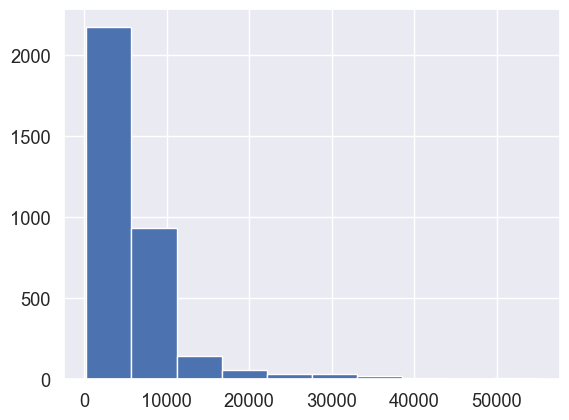

In [44]:
# sepal_length 값의 분포 - hist 함수
plt.hist(x='판매가격', data=df)
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Gl

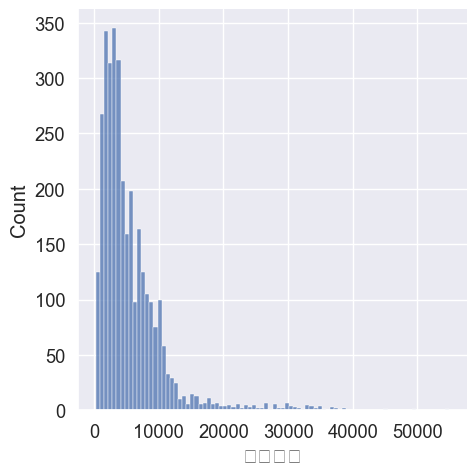

In [45]:
sns.displot(x='판매가격', kind='hist', data=df)
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\us

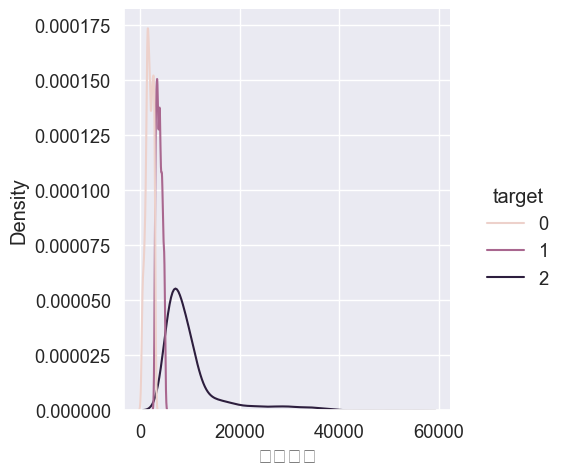

In [46]:
sns.displot(x='판매가격', hue='target', kind='kde', data=df)
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 4420

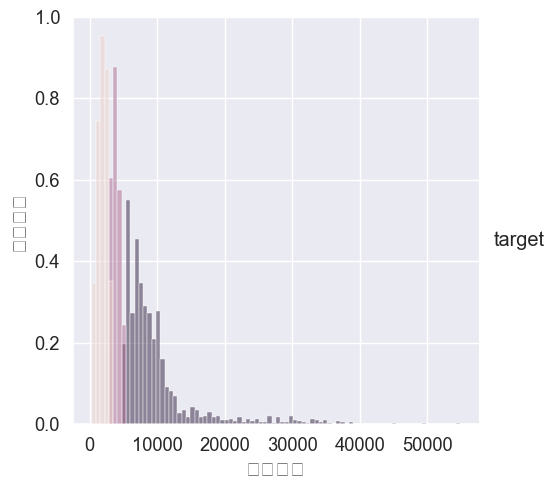

In [49]:
sns.pairplot(df, hue='target', size=5, diag_kind='hist')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
x_data = df.loc[:,'판매가격':]
y_data = df.loc[:,'target']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2704, 3) (2704,)
(677, 3) (677,)


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

ValueError: could not convert string to float: '유한킴벌리'